In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# importing dataset
from google.colab import files
uploaded = files.upload()

Saving monks-1.train to monks-1.train


In [4]:
from google.colab import files
uploaded1 = files.upload()

Saving monks-1.test to monks-1.test


In [13]:
import io
df_train1 = pd.read_csv(io.BytesIO(uploaded['monks-1.train']), names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'], delimiter=' ')

In [14]:
import io
df_test1 = pd.read_csv(io.BytesIO(uploaded1['monks-1.test']), names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'], delimiter=' ')

## DATA SPLIT

In [15]:

class DataHandler():
    '''
        Class which offers methods to handle DataFrames oriented to ML problems.
    '''

    def __init__(self, columns_name=[]):
        self.columns_name = columns_name


    def random_dictionary(self, param_space: dict) -> dict:
        '''
            Returns a dictionary with the same keywords of the passed one, associated with a \
            random value choosen by the list associated to any keyword.\n
            - param_space: dictionary of associations with the following format:\n
                \t'keyword': [value1, ... ,valueN]
        '''
        params = {}

        # Inserts of the keywords with the random values into the dictionary
        for key in param_space.keys():
            params[key] = np.random.choice(param_space[key])

        return params


    def load_data(self, path: str) -> pd.DataFrame:
        '''
            Returns the DataFrame associated to the Data set found at path \"path\".\n
            - path: path to the CSV file with data.
        '''
        return pd.read_csv(filepath_or_buffer=path, names=self.columns_name, delimiter=' ')


    def split_data(self, data: pd.DataFrame, target_col: str, drop_cols: list):
        '''
            Returns a tuple of two new DataFrames: (x,y).\n
            - x: is like \"df\" without the columns specified in the list \"drop_cols\".\n
            - y: is the column indentified by the key \"target_col\".\n
            The parameters are:\n
            - df: the input DataFrame.\n
            - target_col: name of the target column.\n
            - drop_cols: list of columns' name to drop.
        '''
        y = data[target_col].copy(deep=True)
        x = data.drop(columns=drop_cols, axis=1).copy(deep=True)
        return x, y


    def one_hot_encoding(self, data: pd.DataFrame):
        '''
            Returns the DataFrame got by appling the 1-Hot Encoding to the DataFrame \
            passed as parameter.\n
            - df: the DataFrame to whom is applied the 1-Hot Encoding.
        '''

        # Creation of a Deep Copy of the original DataFrame
        df = data.copy(deep=True)

        # For each column we apply the dummies method
        for column in data.columns:

            # Applies one-hot encoding to current column and renames them
            one_hot_cols = pd.get_dummies(df[column], dtype=float)
            one_hot_cols = one_hot_cols.set_axis([column+'_'+str(col) for col in one_hot_cols.columns], axis=1)

            # Drops of the original column and adds the new columns
            df = df.drop(column, axis=1)
            df = pd.concat([df,one_hot_cols], axis=1)

        return df


In [16]:
data_handler = DataHandler(['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'])

# Number of different Datasets
datasets_number = 1

'''# Lists of DataFrames
df_train1 : list[pd.DataFrame] = []
df_test1  : list[pd.DataFrame] = []'''



'# Lists of DataFrames\ndf_train1 : list[pd.DataFrame] = []\ndf_test1  : list[pd.DataFrame] = []'

In [17]:

# Function to split data into features and labels
def split_data(data, target_col, drop_cols):
    # Assuming 'target_col' is the target column name
    y = data[target_col]

    # Assuming 'drop_cols' is a list of columns to drop
    x = data.drop(columns=drop_cols)

    return x, y

# Lists to store training and testing data
x_train_list = []
y_train_list = []
x_test_list = []
y_test_list = []

# Split each dataset into features and labels
# Split training data
x_train, y_train = split_data(df_train1, target_col='target', drop_cols=['target', 'id'])
x_train_list.append(x_train)
y_train_list.append(y_train)

# Split testing data
x_test, y_test = split_data(df_test1, target_col='target', drop_cols=['target', 'id'])
x_test_list.append(x_test)
y_test_list.append(y_test)


## 1-HOT ENCODING

In [18]:
# Applies the 1-Hot Encoding to the "x" data
for i in range(datasets_number):
    x_train = data_handler.one_hot_encoding(x_train)
    x_test  = data_handler.one_hot_encoding(x_test)

    # Print of the data modified
    print(f"Monk 1 [TRAIN]: " + str(x_train.shape))
    print(f"Monk 1 [TEST]: " + str(x_test.shape))

Monk 1 [TRAIN]: (124, 17)
Monk 1 [TEST]: (432, 17)


Basta fare grid search di sklearn che ha già il metodo, copi gli altri iperparametri delle altre grid e avvi cross val score
###### IMPORTANTE LEGGERE #####

Usare solo TANH, niente relu
Usare solo SGD, tanto Adam lo odia e comunque SGD è quello che performa meglio
I learning rate vanno un po' abbassati
I weight decay per monk1 e monk2 NON servono, monk3 SI e per monk3 serve grafico con e grafico senza come chiede il report
sklearn implementa MLPclassifier e anche una sua random grid search (tu li dai i parametri tuoi)
e anche un suo cross validatio cioè cross val score0:
per monk1 partite da questi iperparametri
 {
        'input_units': [17],
        'hidden_units': [3, 4, 5],
        'patience': [10,100,200],
        'factor_lr_dec': [0.5, 1],
        'step_decay': [500, 1000, 1500],
        'learning_rate': [float(i/10) for i in range(1,10)] + [float(i/100) for i in range(1,10)] + [0.99, 0.999],
        'batch_size': [15, 16, 17, 31, 32, 62, 63, 64, 65],
        'epochs': [int(350+epochs) for epochs in range(0,200,10)],
        'weight_init': ['glorot_normal', 'lecun_normal', 'he_normal', 'he_uniform'],
        'momentum': [float(i/10) for i in range(3,9)],
        'activation': ['tanh'],
        'output_activation': ['sigmoid'],
        'metrics': ['accuracy'],
    },

Mi dicono c'è da diminuire i batch
Quindi tipo usare 1,2,3,4,5,6,7 nella grid


# si

Output streaming troncato alle ultime 5000 righe.
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=450, momentum=0.7, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.4s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=450, momentum=0.7, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=450, momentum=0.8, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=450, momentum=0.8, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=450, momentum=0.8, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.2s
[CV] END acti

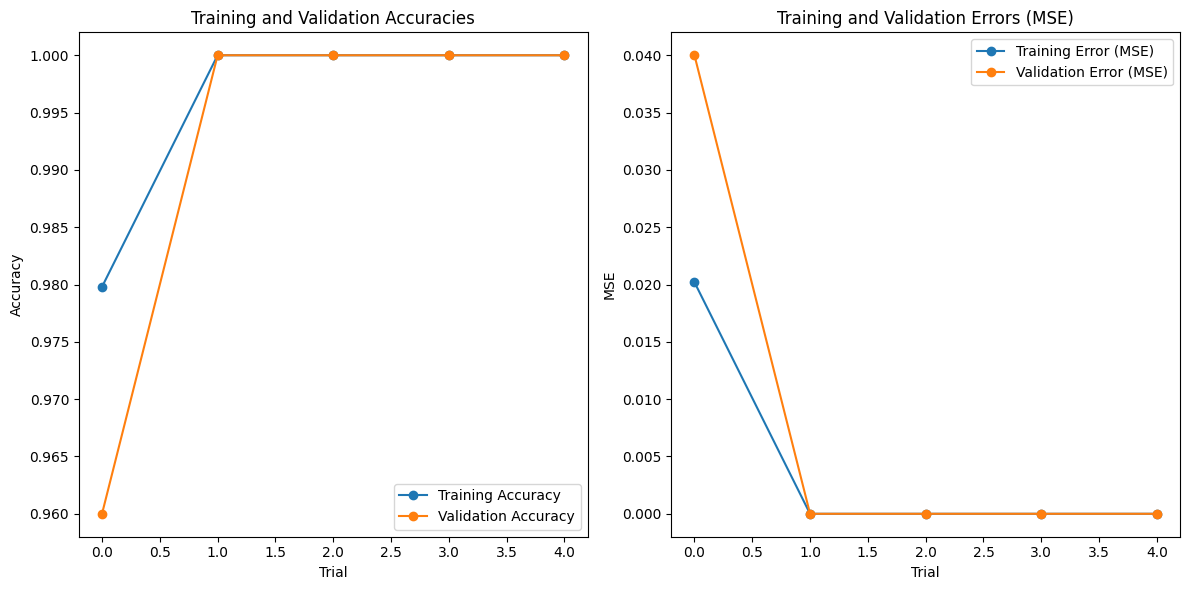

In [19]:
from sklearn.metrics import accuracy_score, mean_squared_error

# Lists to store best hyperparameters
best_hyperparameters = {
    'trial': 0,
    'params': {},
    'mean_validation_accuracy': 0
}

# Lists to store fold-wise accuracies and errors
fold_training_accuracies = []
fold_validation_accuracies = []
train_losses = []
val_losses = []

# Create a KFold instance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize trial counter
trial_counter = 0

# Iterate through each fold in the KFold cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    x_tr, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Define parameter grid for GridSearchCV
    param_space = {
        'hidden_layer_sizes': [(3,), (4,)],
        'learning_rate_init': [0.3, 0.4],
        'momentum': [0.6, 0.7, 0.8],
        'nesterovs_momentum': [True, False],
        'activation': ['tanh'],
        'solver': ['sgd'],
        'batch_size': [2, 4, 6],
        'shuffle': [True],
        'max_iter': [340, 440, 450],
    }

    # Increment trial counter
    trial_counter += 1

    # Create GridSearchCV instance
    mlp_gs = GridSearchCV(estimator=mlp, param_grid=param_space, cv=5, verbose=2)

    # Fit the MLPClassifier using the current training fold and hyperparameters
    mlp_gs.fit(x_tr, y_tr)

    # Get best hyperparameters and mean validation accuracy
    best_params = mlp_gs.best_params_
    mean_val_accuracy = mlp_gs.best_score_

    # Store the best hyperparameters if mean validation accuracy improves
    if mean_val_accuracy > best_hyperparameters['mean_validation_accuracy']:
        best_hyperparameters['trial'] = trial_counter
        best_hyperparameters['params'] = best_params
        best_hyperparameters['mean_validation_accuracy'] = mean_val_accuracy

    # Predictions on training and validation sets
    y_train_pred = mlp_gs.predict(x_tr)
    y_val_pred = mlp_gs.predict(x_val)

    # Compute training and validation accuracy
    train_accuracy = accuracy_score(y_tr, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Compute Mean Squared Error (MSE) for training and validation sets
    train_error = mean_squared_error(y_tr, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    # Store accuracies and errors for each fold
    fold_training_accuracies.append(train_accuracy)
    fold_validation_accuracies.append(val_accuracy)
    train_losses.append(train_error)
    val_losses.append(val_error)

    # Display fold-wise results
    print(f"\nFold {trial_counter}:")
    print(f"Best parameters found: {best_params}")
    print(f"Mean Validation Accuracy: {mean_val_accuracy:.4f}")
    print(f"Training Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Error (MSE): {train_error:.4f} | Validation Error (MSE): {val_error:.4f}")

# Display best hyperparameters across all folds
print("\nBest Hyperparameters Across Folds:")
print(f"Trial {best_hyperparameters['trial']}: {best_hyperparameters['params']}")
print(f"Mean Validation Accuracy: {best_hyperparameters['mean_validation_accuracy']:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot accuracies
plt.subplot(1, 2, 1)
plt.plot(fold_training_accuracies, label='Training Accuracy', marker='o')
plt.plot(fold_validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracies')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.legend()

# Plot errors
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Error (MSE)', marker='o')
plt.plot(val_losses, label='Validation Error (MSE)', marker='o')
plt.title('Training and Validation Errors (MSE)')
plt.xlabel('Trial')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Fit the MLPClassifier on the entire training set using the best hyperparameters
best_mlp = MLPClassifier(**best_hyperparameters['params'], random_state=42)
best_mlp.fit(x_train, y_train)

# Evaluate on the test set
y_true, y_pred = y_test, best_mlp.predict(x_test)

# Display results on the test set
print('\nResults on the test set:')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_true, y_pred))


Results on the test set:
Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



# no

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

hidden_layer_sizes = (100, 200,)

clf = MLPClassifier(random_state=0)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9120370370370371
F1-score [0.91203704 0.91203704]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       216
           1       0.91      0.91      0.91       216

    accuracy                           0.91       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.91      0.91      0.91       432



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


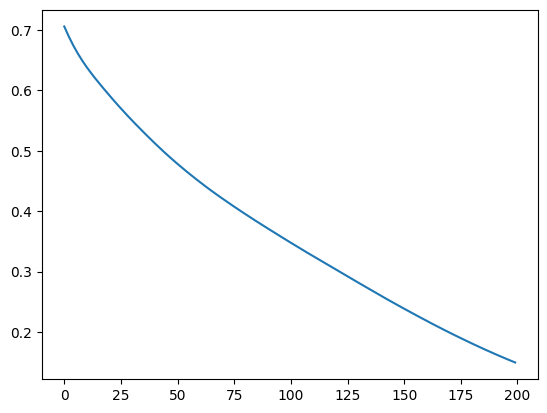

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,
                    learning_rate='adaptive',
                    activation='tanh', early_stopping=False,
                    momentum=0.9, random_state=0, max_iter=500)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



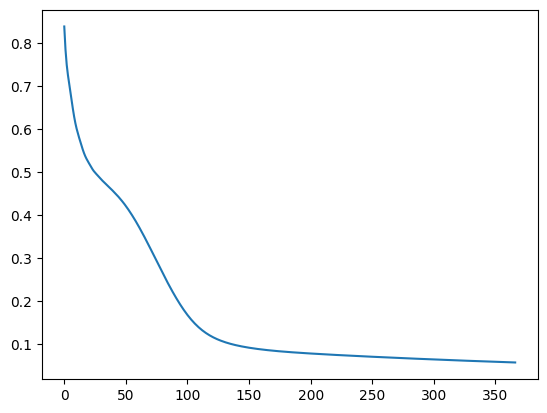

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5648148148148148
F1-score [0.63565891 0.45977011]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       216
           1       0.61      0.37      0.46       216

    accuracy                           0.56       432
   macro avg       0.58      0.56      0.55       432
weighted avg       0.58      0.56      0.55       432



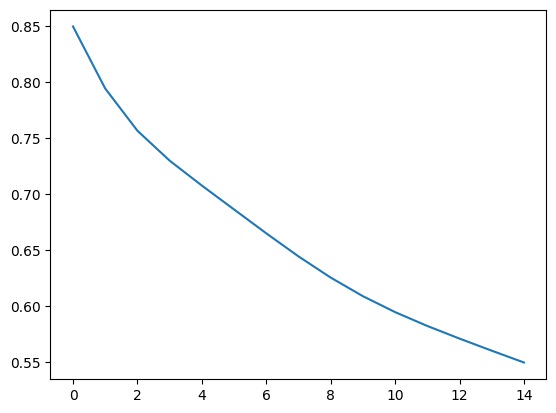

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

'''Define the neural network structure ( # of input units, # of hidden units, etc).
Initialize the model's parameters
Loop:
- Implement forward propagation
- Compute loss
- Implement backward propagation to get the gradients
- Update parameters (gradient descent)'''

param_space = {
    'hidden_layer_sizes': [(3,), (4,)],
    # In the hidden_layer_sizes parameter, when you have a tuple like (17,), it means that there is one hidden layer in the neural network with 17 neurons in that layer. Similarly, (8,) means one hidden layer with 8 neurons. On the other hand, if you have a list like [17, 8], it would represent a neural network with two hidden layers, one with 17 neurons and the other with 8 neurons.
    #'learning_rate': ['constant'],
    'learning_rate_init': [0.3, 0.4], #for i  in range(1)], #float(i/100)
    'momentum': [0.6, 0.7, 0.8],  #float(i/100) for i  in range(1,10)
    'nesterovs_momentum': [True, False],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'batch_size': [2, 4, 6],
    'shuffle': [True], # sgd already shuffle data (from ML slides_NN2)
    'max_iter': [340, 440, 450],
    #'random_state':
    #'tol':
    #'n_iter_no_change':
}

# Create a KFold instance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics during training
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Lists to store best hyperparameters
best_hyperparameters = {
    'trial': 0,
    'params': {},
    'mean_validation_accuracy': 0
}

# Lists to store fold-wise accuracies
fold_training_accuracies = []
fold_validation_accuracies = []


# Define the MLPClassifier
mlp = MLPClassifier(random_state=42) #warm_start=False


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

    for train_index, val_index in kfold.split(x_train, y_train):  # Perform cross-validation split
        x_tr, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        mlp_gs = GridSearchCV(estimator = mlp, param_grid = param_space, cv = 5, verbose=2)
        mlp_gs.fit(x_train, y_train)
        mlp_gs.best_params_

        # Display the best parameters and the corresponding mean score
        print("Best parameters found: ", mlp_gs.best_params_)
        print("Best score: ", mlp_gs.best_score_)

Output streaming troncato alle ultime 5000 righe.
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=440, momentum=0.8, nesterovs_momentum=True, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=440, momentum=0.8, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.3s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=440, momentum=0.8, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=440, momentum=0.8, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END activation=tanh, batch_size=4, hidden_layer_sizes=(3,), learning_rate_init=0.3, max_iter=440, momentum=0.8, nesterovs_momentum=False, shuffle=True, solver=sgd; total time=   0.2s
[CV] END ac